In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
cd = pd.read_csv("emissiondata.csv")        

In [3]:
print(cd.columns)

Index(['Ambient Temperature', 'Ambient Pressure (mbar)',
       'Ambient Humidity (%)', 'Air filter difference pressure (mbar)',
       'Gas turbine exhaust pressure (mbar)', 'Turbine inlet temperature',
       'Turbine after temperature', 'Turbine energy yield (mwh)',
       'Compressor discharge pressure', 'CO (mg/m3)', 'NOX'],
      dtype='object')


In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Ambient Temperature                    36733 non-null  float64
 1   Ambient Pressure (mbar)                36733 non-null  float64
 2   Ambient Humidity (%)                   36733 non-null  float64
 3   Air filter difference pressure (mbar)  36733 non-null  float64
 4   Gas turbine exhaust pressure (mbar)    36733 non-null  float64
 5   Turbine inlet temperature              36733 non-null  float64
 6   Turbine after temperature              36733 non-null  float64
 7   Turbine energy yield (mwh)             36733 non-null  float64
 8   Compressor discharge pressure          36733 non-null  float64
 9   CO (mg/m3)                             36733 non-null  float64
 10  NOX                                    36733 non-null  float64
dtypes:

In [5]:
cd.describe()

,Ambient Temperature,Ambient Pressure (mbar),Ambient Humidity (%),Air filter difference pressure (mbar),Gas turbine exhaust pressure (mbar),Turbine inlet temperature,Turbine after temperature,Turbine energy yield (mwh),Compressor discharge pressure,CO (mg/m3),NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [6]:
cd.duplicated().sum()              # calculating no of duplicate rows.

7

In [7]:
print(cd[cd.duplicated()])


       Ambient Temperature  Ambient Pressure (mbar)  Ambient Humidity (%)  \
26399               23.156                   1004.2                95.938   
26400               23.156                   1004.2                95.938   
26401               23.156                   1004.2                95.938   
26402               23.156                   1004.2                95.938   
27389               26.067                   1008.3                87.328   
27390               26.067                   1008.3                87.328   
27391               26.067                   1008.3                87.328   

       Air filter difference pressure (mbar)  \
26399                                 4.0547   
26400                                 4.0547   
26401                                 4.0547   
26402                                 4.0547   
27389                                 5.0703   
27390                                 5.0703   
27391                                 5.0703   

In [8]:
cd.drop_duplicates(inplace=True)

In [9]:
cd.describe()

,Ambient Temperature,Ambient Pressure (mbar),Ambient Humidity (%),Air filter difference pressure (mbar),Gas turbine exhaust pressure (mbar),Turbine inlet temperature,Turbine after temperature,Turbine energy yield (mwh),Compressor discharge pressure,CO (mg/m3),NOX
count,36726.000000,36726.000000,36726.000000,36726.000000,36726.000000,36726.000000,36726.000000,36726.000000,36726.000000,36726.000000,36726.000000
mean,17.711451,1013.071521,77.864274,3.925410,25.563537,1081.427166,546.158062,133.506079,12.060470,2.372627,65.296061
std,7.447561,6.463155,14.461250,0.773939,4.196157,17.537244,6.842901,15.619558,1.088861,2.262856,11.677402
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.779250,1008.800000,68.182500,3.355525,23.127250,1071.800000,544.720000,124.450000,11.434000,1.182325,57.164250
50%,17.798000,1012.600000,80.465500,3.937450,25.104500,1085.900000,549.880000,133.730000,11.965000,1.713700,63.851000
75%,23.664000,1017.000000,89.373750,4.376800,29.059000,1097.000000,550.040000,144.080000,12.853750,2.843350,71.549000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [10]:
print(cd.isnull().sum())    # therefore, no null values in any column.

Ambient Temperature                      0
Ambient Pressure (mbar)                  0
Ambient Humidity (%)                     0
Air filter difference pressure (mbar)    0
Gas turbine exhaust pressure (mbar)      0
Turbine inlet temperature                0
Turbine after temperature                0
Turbine energy yield (mwh)               0
Compressor discharge pressure            0
CO (mg/m3)                               0
NOX                                      0
dtype: int64


In [11]:
cd.corr()          #measure of the linear relationship between the two variables


,Ambient Temperature,Ambient Pressure (mbar),Ambient Humidity (%),Air filter difference pressure (mbar),Gas turbine exhaust pressure (mbar),Turbine inlet temperature,Turbine after temperature,Turbine energy yield (mwh),Compressor discharge pressure,CO (mg/m3),NOX
Ambient Temperature,1.000000,-0.406508,-0.476538,0.251868,0.045777,0.183659,0.281845,-0.091203,0.015223,-0.174276,-0.558095
Ambient Pressure (mbar),-0.406508,1.000000,-0.014961,-0.040258,0.057575,-0.005371,-0.225546,0.118230,0.102676,0.066987,0.191700
Ambient Humidity (%),-0.476538,-0.014961,1.000000,-0.147971,-0.235216,-0.221858,0.022889,-0.137365,-0.196321,0.106663,0.164931
Air filter difference pressure (mbar),0.251868,-0.040258,-0.147971,1.000000,0.678456,0.691269,-0.466953,0.665477,0.702552,-0.448410,-0.188138
Gas turbine exhaust pressure (mbar),0.045777,0.057575,-0.235216,0.678456,1.000000,0.874223,-0.699743,0.964128,0.978469,-0.518908,-0.201617
Turbine inlet temperature,0.183659,-0.005371,-0.221858,0.691269,0.874223,1.000000,-0.380877,0.910293,0.908463,-0.706287,-0.213869
Turbine after temperature,0.281845,-0.225546,0.022889,-0.466953,-0.699743,-0.380877,1.000000,-0.682413,-0.706469,0.058376,-0.092711
Turbine energy yield (mwh),-0.091203,0.118230,-0.137365,0.665477,0.964128,0.910293,-0.682413,1.000000,0.988780,-0.569823,-0.116150
Compressor discharge pressure,0.015223,0.102676,-0.196321,0.702552,0.978469,0.908463,-0.706469,0.988780,1.000000,-0.551026,-0.171247
CO (mg/m3),-0.174276,0.066987,0.106663,-0.448410,-0.518908,-0.706287,0.058376,-0.569823,-0.551026,1.000000,0.340580


<AxesSubplot:>

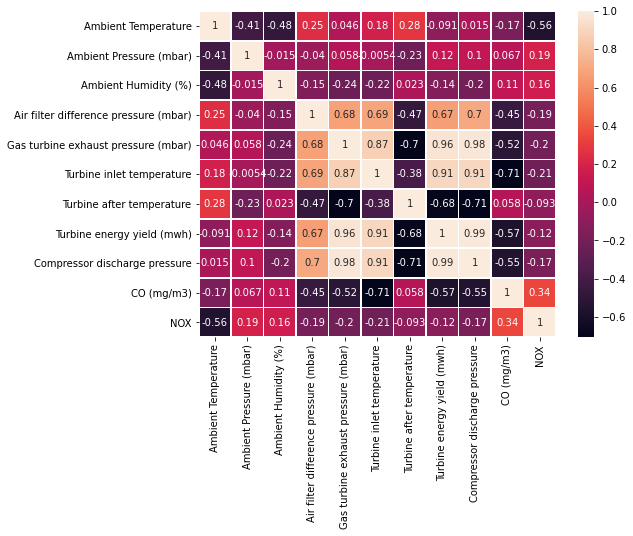

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(cd.corr(),annot=True,linewidth=.7,)


In [13]:
corr=cd.corr()

high_corr_features=corr.index[abs(corr['CO (mg/m3)'])>0.50]
print(f'highly correlated feature:\n',high_corr_features)
print(f'No. of highly correlated features:',len(high_corr_features))


highly correlated feature:
 Index(['Gas turbine exhaust pressure (mbar)', 'Turbine inlet temperature',
       'Turbine energy yield (mwh)', 'Compressor discharge pressure',
       'CO (mg/m3)'],
      dtype='object')
No. of highly correlated features: 5


<AxesSubplot:>

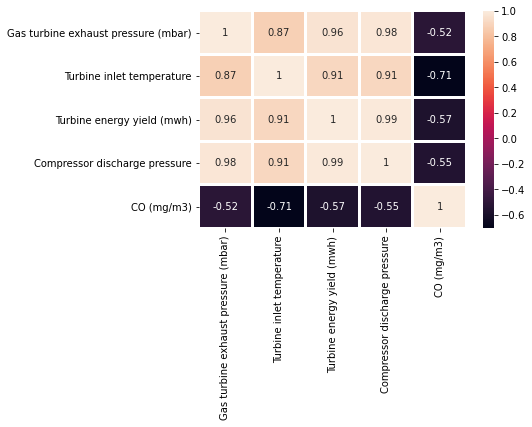

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(cd[high_corr_features].corr(),annot=True,linewidth=2,)


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [16]:
x=cd.drop(['CO (mg/m3)','NOX'], axis=1)
y=cd[['CO (mg/m3)']]


In [17]:
x

,Ambient Temperature,Ambient Pressure (mbar),Ambient Humidity (%),Air filter difference pressure (mbar),Gas turbine exhaust pressure (mbar),Turbine inlet temperature,Turbine after temperature,Turbine energy yield (mwh),Compressor discharge pressure
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910
...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771


In [18]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.25, random_state=42)

In [19]:
xtr.shape

(27544, 9)

In [20]:
xte.shape

(9182, 9)

In [21]:
y.describe()

,CO (mg/m3)
count,36726.000000
mean,2.372627
std,2.262856
min,0.000388
25%,1.182325
50%,1.713700
75%,2.843350
max,44.103000


In [22]:
scaler = StandardScaler()
xs_train=scaler.fit_transform(xtr)
xs_test=scaler.fit_transform(xte)


In [23]:
# 1. Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xs_train,ytr)

LinearRegression()

In [25]:
ypred_tr = lr.predict(xs_train)
ypred_te = lr.predict(xs_test)

In [26]:
rmse1 = math.sqrt(mean_squared_error(ypred_tr,ytr))

rmse2 = math.sqrt(mean_squared_error(ypred_te,yte))

print("\nTrain rmse: ",rmse1)
print("Test rmse: ",rmse2)


Train rmse:  1.5011588038135169
Test rmse:  1.4777372312523664


Text(0, 0.5, 'Predicted CO level')

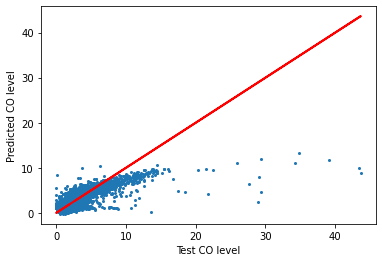

In [27]:
plt.scatter(yte,ypred_te,s=4)
plt.plot(yte,yte,lw=2,c='r')
plt.xlabel('Test CO level')
plt.ylabel('Predicted CO level')

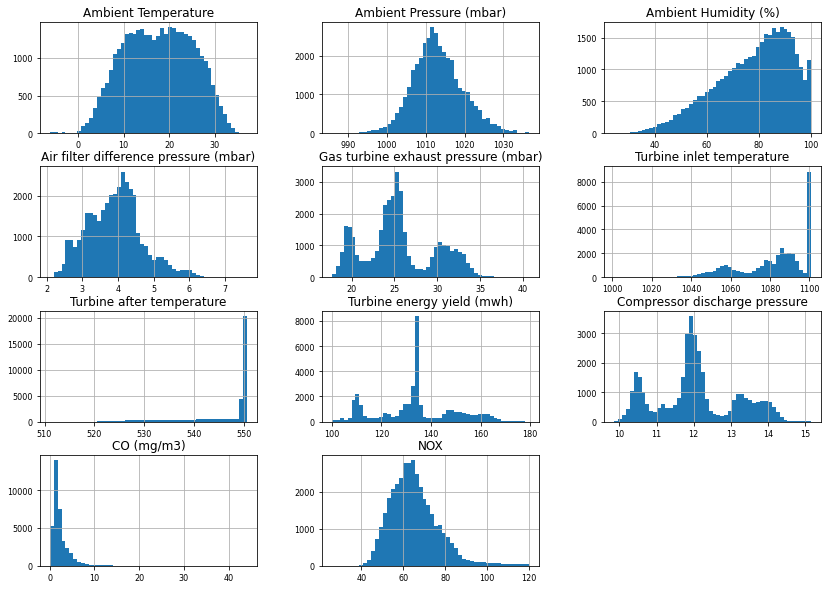

In [28]:
#Numerical data distribution

cd_num = cd.select_dtypes(include = ['float64', 'int64'])


cd_num.hist(figsize=(14, 10), bins=50, xlabelsize=8, ylabelsize=8);


In [29]:
# 2. Random Forest


In [30]:
nbotv = [50,100,200,500,750,1000,2000]
nbot = [0,1,2,3,4,5,6]
nbot_len =len(nbot)
nbot


[0, 1, 2, 3, 4, 5, 6]

In [31]:
irms = np.zeros((nbot_len,))
orms = np.zeros((nbot_len,))

In [32]:
for i,j in zip(nbotv,nbot):
   rf = RandomForestRegressor(n_estimators= i, random_state=42,max_features=3,max_leaf_nodes=50,max_depth = None)
   rf.fit(xtr,ytr)
   ypred_tr2 = rf.predict(xtr)
   ypred_te2 = rf.predict(xte)
   irms[j] = math.sqrt(mean_squared_error(ypred_tr2,ytr))
   orms[j] = math.sqrt(mean_squared_error(ypred_te2,yte))

<ipython-input-32-1c47ef48d7f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)
<ipython-input-32-1c47ef48d7f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)
<ipython-input-32-1c47ef48d7f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)
<ipython-input-32-1c47ef48d7f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)
<ipython-input-32-1c47ef48d7f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

Text(0, 0.5, 'Rmse, in sample ')

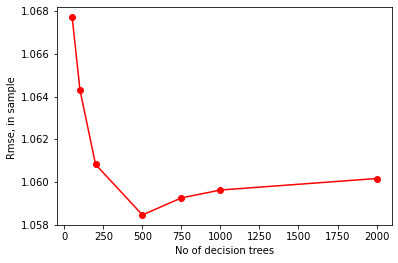

In [33]:
plt.plot(nbotv,irms,'-ok',c='r')

plt.xlabel('No of decision trees')
plt.ylabel('Rmse, in sample ')


Text(0, 0.5, 'Rmse out of sample')

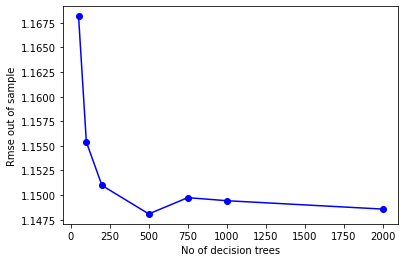

In [34]:
plt.plot(nbotv,orms,'-ok',c='b')

plt.xlabel('No of decision trees')
plt.ylabel('Rmse out of sample')


In [35]:
for i in range(nbot_len):
    print(nbotv[i]," ",orms[i])

50   1.1681708118582763
100   1.155394303418626
200   1.150983025463649
500   1.1480892533831195
750   1.1497423005671943
1000   1.1494311423654857
2000   1.1485793322871183


In [36]:
rf = RandomForestRegressor(n_estimators= 500, random_state=42,max_features=3,max_leaf_nodes=50,max_depth = None)
rf.fit(xtr,ytr)

ypred_tr500 = rf.predict(xtr)
ypred_te500 = rf.predict(xte)

<ipython-input-36-273ea21c1e25>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)


In [37]:
rmse3 = math.sqrt(mean_squared_error(ypred_tr500,ytr))

rmse4 = math.sqrt(mean_squared_error(yte,ypred_te500))

print("\nTrain rmse: ",rmse3)
print("Test rmse: ",rmse4)


Train rmse:  1.0584583675459172
Test rmse:  1.1480892533831195


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


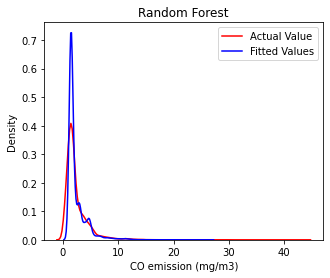

In [38]:
import seaborn as sns
plt.figure(figsize=(5, 4))    #width and height


ax = sns.distplot(yte, hist=False, color="r", label="Actual Value")
sns.distplot(ypred_te2, hist=False, color="b", label="Fitted Values",ax=ax )
plt.legend()
plt.xlabel('CO emission (mg/m3)')
plt.title('Random Forest')


plt.show()
plt.close()


In [39]:
rfb = RandomForestRegressor(n_estimators=500)
rfb.fit(x, y)


<ipython-input-39-d26a66bc3283>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfb.fit(x, y)


RandomForestRegressor(n_estimators=500)

In [40]:
rfb.feature_importances_


array([0.0502567 , 0.03665358, 0.03866378, 0.05413941, 0.03833596,
       0.50632931, 0.21423518, 0.03895524, 0.02243085])

<BarContainer object of 9 artists>

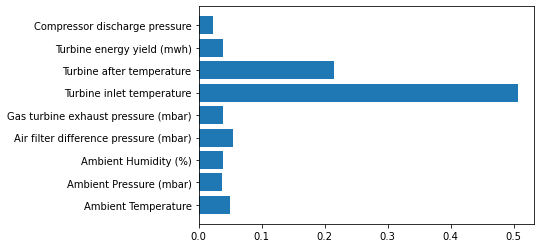

In [41]:
plt.barh(x.columns, rfb.feature_importances_)


Text(0.5, 0, 'Random Forest Feature Importance')

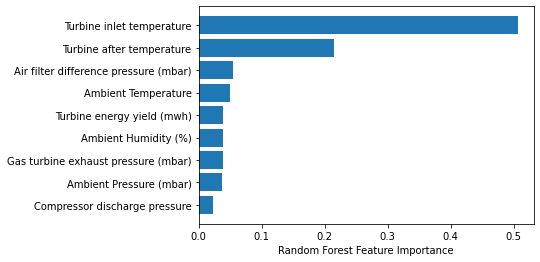

In [42]:
sorted_idx = rfb.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rfb.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [43]:
# 3. Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [45]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr = math.sqrt(mean_squared_error(ytr, gbr.predict(xtr)))

rmse_te = math.sqrt(mean_squared_error(yte,gbr.predict(xte) ))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.740
The root mean squared error (MSE) on train set: {:.4f} 1.1063565292847772

The root mean squared error (MSE) on train set: {:.4f} 1.1702178229300102


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


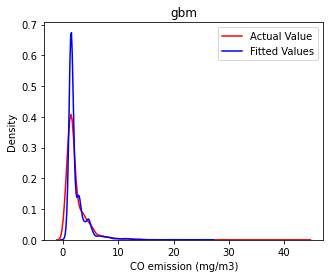

In [46]:
import seaborn as sns
plt.figure(figsize=(5, 4))    #width and height


ax = sns.distplot(yte, hist=False, color="r", label="Actual Value")
sns.distplot(gbr.predict(xte), hist=False, color="b", label="Fitted Values",ax=ax )
plt.legend()
plt.xlabel('CO emission (mg/m3)')
plt.title('gbm')


plt.show()
plt.close()


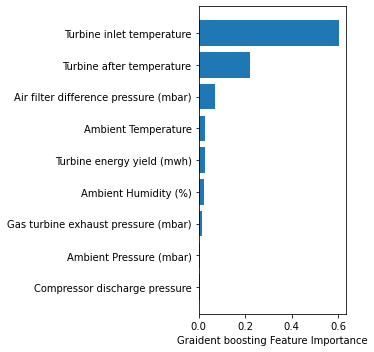

In [47]:
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx2 = np.argsort(feature_importance)
pos = np.arange(sorted_idx2.shape[0]) + .5
fig = plt.figure(figsize=(5, 5))
plt.barh(pos, feature_importance[sorted_idx2], align='center')
plt.yticks(pos, np.array(cd.columns)[sorted_idx])         

# intead of feature_names use cd.columns
#https://datascience.stackexchange.com/questions/63556/i-got-the-following-error-dataframe-object-has-no-attribute-data-can-you-h

plt.xlabel('Graident boosting Feature Importance')
result = permutation_importance(gbr, xte, yte, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx2 = result.importances_mean.argsort()
fig.tight_layout()
plt.show()





Text(0.5, 0, 'Graident boosting Feature Importance')

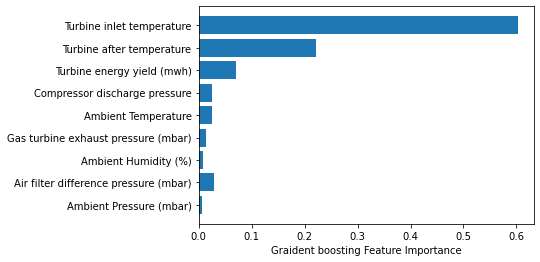

In [48]:
plt.barh(x.columns[sorted_idx2], gbr.feature_importances_[sorted_idx2])
plt.xlabel('Graident boosting Feature Importance')


In [49]:
# trying out different parameters

In [80]:
gbrq_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbrq = GradientBoostingRegressor(**gbrq_params)
#
# Fit the model
#
gbrq.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbrq.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr2 = math.sqrt(mean_squared_error(ytr, gbrq.predict(xtr)))

rmse_te2 = math.sqrt(mean_squared_error(yte, gbrq.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr2))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te2))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.776
The root mean squared error (MSE) on train set: {:.4f} 0.7698645406430275

The root mean squared error (MSE) on train set: {:.4f} 1.0870557608640143


In [51]:
gbr3_params = {'n_estimators': 1000,
          'max_depth': 2,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr3 = GradientBoostingRegressor(**gbr3_params)
#
# Fit the model
#
gbr3.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr3.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr3 = math.sqrt(mean_squared_error(ytr, gbr3.predict(xtr)))

rmse_te3 = math.sqrt(mean_squared_error(yte, gbr3.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr3))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te3))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.726
The root mean squared error (MSE) on train set: {:.4f} 0.9841994209516991

The root mean squared error (MSE) on train set: {:.4f} 1.2021950357563116


In [52]:
gbr4_params = {'n_estimators': 1000,
          'max_depth': 2,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr4 = GradientBoostingRegressor(**gbr4_params)
#
# Fit the model
#
gbr4.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr4.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr4 = math.sqrt(mean_squared_error(ytr, gbr4.predict(xtr)))

rmse_te4 = math.sqrt(mean_squared_error(yte, gbr4.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr4))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te4))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.715
The root mean squared error (MSE) on train set: {:.4f} 1.2333169573814513

The root mean squared error (MSE) on train set: {:.4f} 1.2255453909870553


In [53]:
gbr5_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr5 = GradientBoostingRegressor(**gbr5_params)
#
# Fit the model
#
gbr5.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr5.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr5 = math.sqrt(mean_squared_error(ytr, gbr5.predict(xtr)))

rmse_te5 = math.sqrt(mean_squared_error(yte, gbr5.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr5))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te5))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.772
The root mean squared error (MSE) on train set: {:.4f} 0.8878796472288605

The root mean squared error (MSE) on train set: {:.4f} 1.094799844150033


In [54]:
gbr6_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr6 = GradientBoostingRegressor(**gbr6_params)
#
# Fit the model
#
gbr6.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr6.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr6 = math.sqrt(mean_squared_error(ytr, gbr6.predict(xtr)))

rmse_te6 = math.sqrt(mean_squared_error(yte, gbr6.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr6))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te6))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.729
The root mean squared error (MSE) on train set: {:.4f} 1.168172179443907

The root mean squared error (MSE) on train set: {:.4f} 1.1945530268395486


In [55]:
gbr7_params = {'n_estimators': 500,
          'max_depth': 2,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr7 = GradientBoostingRegressor(**gbr7_params)
#
# Fit the model
#
gbr7.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr7.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr7 = math.sqrt(mean_squared_error(ytr, gbr7.predict(xtr)))

rmse_te7 = math.sqrt(mean_squared_error(yte, gbr7.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr7))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te7))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.705
The root mean squared error (MSE) on train set: {:.4f} 1.271073713880032

The root mean squared error (MSE) on train set: {:.4f} 1.2459577044069259


In [56]:
gbr8_params = {'n_estimators': 500,
          'max_depth': 2,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr8 = GradientBoostingRegressor(**gbr8_params)
#
# Fit the model
#
gbr8.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr8.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr8 = math.sqrt(mean_squared_error(ytr, gbr8.predict(xtr)))

rmse_te8 = math.sqrt(mean_squared_error(yte, gbr8.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr8))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te8))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.727
The root mean squared error (MSE) on train set: {:.4f} 1.0644711467202104

The root mean squared error (MSE) on train set: {:.4f} 1.1987314925038401


In [57]:
gbr9_params = {'n_estimators': 3000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr9 = GradientBoostingRegressor(**gbr9_params)
#
# Fit the model
#
gbr9.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr9.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr9 = math.sqrt(mean_squared_error(ytr, gbr9.predict(xtr)))

rmse_te9 = math.sqrt(mean_squared_error(yte, gbr9.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr9))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te9))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.766
The root mean squared error (MSE) on train set: {:.4f} 0.5702845406883977

The root mean squared error (MSE) on train set: {:.4f} 1.1106078196389535


In [67]:
## loop over learning rate
#nbotv = np.arange(5,51)
#nbot = len(nbotv)

mmm = [0.005,0.007,0.01,0.05,0.1,0.2,0.3,0.5] #learning rate values
nnn = [0,1,2,3,4,5,6,7]
nbot_len =len(nnn)
nbot

irms3 = np.zeros((nbot_len,))
orms3 = np.zeros((nbot_len,))

In [68]:
for k,l in zip(mmm,nnn):
    gbxxx = GradientBoostingRegressor(n_estimators= 1000,max_depth= 3,min_samples_split= 5,learning_rate= k,loss= 'ls')
    gbxxx.fit(xtr,ytr)
    ypred_tr_new3 = gbxxx.predict(xtr)
    ypred_te_new3 = gbxxx.predict(xte)
    orms3[l] = math.sqrt(mean_squared_error(ypred_te_new3,yte))
    irms3[l] = math.sqrt(mean_squared_error(ypred_tr_new3,ytr))



/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed 

Text(0, 0.5, 'Rmse, in sample (blue)')

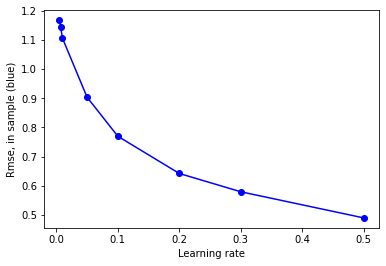

In [69]:
plt.plot(mmm,irms3,'-ok',c='b')
plt.xlabel('Learning rate')
plt.ylabel('Rmse, in sample (blue)')

Text(0, 0.5, 'Rmse, out of sample (red)')

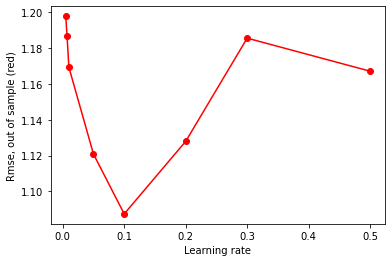

In [70]:
plt.plot(mmm,orms3,'-ok',c='r')
plt.xlabel('Learning rate')
plt.ylabel('Rmse, out of sample (red)')